In [ ]:
import sys, os

!git clone https://github.com/WegraLee/deep-learning-from-scratch.git
os.chdir("/content/deep-learning-from-scratch/ch01")
sys.path.append(os.pardir)

Cloning into 'deep-learning-from-scratch'...
remote: Enumerating objects: 826, done.
remote: Total 826 (delta 0), reused 0 (delta 0), pack-reused 826
Receiving objects: 100% (826/826), 52.21 MiB | 25.34 MiB/s, done.
Resolving deltas: 100% (477/477), done.


In [ ]:
import sys, os

!git clone https://github.com/WegraLee/deep-learning-from-scratch-2.git
os.chdir("/content/deep-learning-from-scratch-2/ch07")
sys.path.append(os.pardir)

Cloning into 'deep-learning-from-scratch-2'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 598 (delta 10), reused 0 (delta 0), pack-reused 580
Receiving objects: 100% (598/598), 29.81 MiB | 4.90 MiB/s, done.
Resolving deltas: 100% (359/359), done.


In [ ]:
import numpy as np
import time
import matplotlib.pyplot as plt
from common.np import *  
from common.util import clip_grads
from common.optimizer import *
from common.trainer import RnnlmTrainer
from dataset import ptb, sequence
from ch06.rnnlm import Rnnlm
from common.util import eval_perplexity
from ch06.better_rnnlm import BetterRnnlm
from common.time_layers import *
from common.base_model import BaseModel
from common.util import eval_seq2seq
from ch07.seq2seq import Seq2seq
from ch07.peeky_seq2seq import PeekySeq2seq
from common.trainer import Trainer
from ch08.attention_seq2seq import AttentionSeq2seq

# Multilayer Perceptron (MLP)

## Base Model

In [ ]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)
x_train = x_train[:8000]
t_train = t_train[:8000]
x_test=x_test[:2000]
t_test=t_test[:2000]

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
train loss:0.00798937000711737
train loss:0.0856124207554004
train loss:0.08997405861909465
train loss:0.07901276167794845
train loss:0.05322514592176806
train loss:0.041264759974042706
train loss:0.010012114876264928
train loss:0.04589387434238792
train loss:0.017062825229241445
train loss:0.03778103640206883
train loss:0.11985145989990198
train loss:0.11847311856884145
train loss:0.04496926523271658
train loss:0.05477236479256039
train loss:0.007771780929959227
train loss:0.012345853171837966
train loss:0.015048572097519237
train loss:0.052243827780744316
train loss:0.004097072248072044
train loss:0.15182658042051622
train loss:0.04485478175053033
train loss:0.008104112470587142
train loss:0.009126816430342933
train loss:0.06735174569330604
train loss:0.04758284406061092
train loss:0.031112956774196534
train loss:0.04701799687701341
train loss:0.008087939883870212
train loss:0.020899242570752617
train loss:0.10293882686663154
train loss:0.015134902

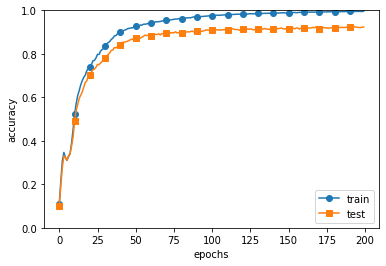

In [ ]:
network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                              output_size=10, use_dropout=True, dropout_ration=0.2)
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=200, mini_batch_size=100,
                  optimizer='sgd', optimizer_param={'lr': 0.01}, verbose=True)
trainer.train()

train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list

markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

## Tuned Model

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
train loss:0.00011773647148180615
train loss:0.00017661062087243696
train loss:0.00015563246323645124
train loss:0.00011073249440537112
train loss:0.0001494025440040362
train loss:0.002322265130672009
train loss:0.00024005502814272405
train loss:0.000299013172383635
train loss:0.00018236077379321622
train loss:6.741577830471625e-05
train loss:0.00013390798025965421
train loss:0.00014923317266438122
train loss:0.00014711906452378532
train loss:0.0001429350782590975
train loss:0.00021511444205277524
train loss:0.00014976237378839385
train loss:0.00017944555494318467
train loss:0.0003189234077716715
train loss:0.00019269345738979086
train loss:0.00016478483936961885
train loss:0.00014550478590494325
train loss:0.0002977057416103542
train loss:0.0002493011073607161
train loss:0.00018121676067558393
train loss:0.00023808409613384256
train loss:0.0003584254529269811
train loss:0.00015463644967261903
train loss:0.00011214653913913058
train loss:0.0079414800

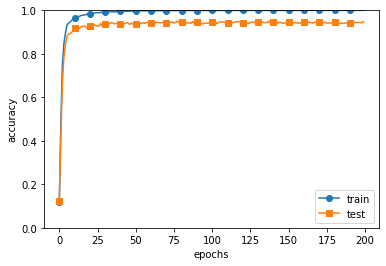

In [ ]:
network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100, 100, 100],
                              output_size=10, use_dropout=True, dropout_ration=0.2, use_batchnorm=True)
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=200, mini_batch_size=100,
                  optimizer='adam', optimizer_param={'lr': 0.001}, verbose=True)
trainer.train()

train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list

markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

# Convolutional Neural Network (CNN)

In [ ]:
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=False)
x_train = x_train[:800]
t_train = t_train[:800]
x_test=x_test[:200]
t_test=t_test[:200]

Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!


## Base Model

train loss:2.306328491560718
=== epoch:1, train acc:0.1075, test acc:0.08 ===
train loss:2.3088596806043102
train loss:2.319756442775913
train loss:2.330648641402162
train loss:2.2801642404318674
train loss:2.2882959146725135
train loss:2.266215524983661
train loss:2.25826115797134
train loss:2.2555971611600185
=== epoch:2, train acc:0.1675, test acc:0.195 ===
train loss:2.2673314901091244
train loss:2.2557301467453237
train loss:2.2645722872244263
train loss:2.254054846374546
train loss:2.2426717269982235
train loss:2.1911283859662416
train loss:2.169033907031
train loss:2.184768991360225
=== epoch:3, train acc:0.4575, test acc:0.4 ===
train loss:2.1403067937560345
train loss:2.1437269103837973
train loss:2.16831562409481
train loss:1.959587975917247
train loss:2.1236547379490287
train loss:1.9915024701169752
train loss:2.09275711041643
train loss:2.0731744524946647
=== epoch:4, train acc:0.62375, test acc:0.575 ===
train loss:2.069778769055776
train loss:1.9378841524585437
train loss

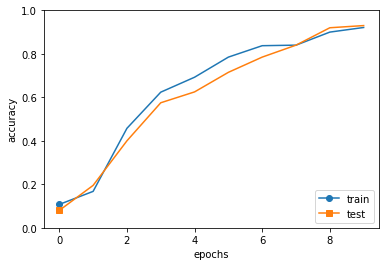

In [ ]:
network = DeepConvNet()  
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=10, mini_batch_size=100,
                  optimizer='Adam', optimizer_param={'lr':0.001}, verbose=True)
trainer.train()
train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list

markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

## Tuned Model

In [ ]:
class DeepConvNet:
    """정확도 99% 이상의 고정밀 합성곱 신경망

    네트워크 구성은 아래와 같음
        conv - relu - conv- relu - pool -
        conv - relu - conv- relu - pool -
        conv - relu - conv- relu - pool -
        affine - relu - dropout - affine - dropout - softmax
    """
    def __init__(self, input_dim=(1, 28, 28),
                 conv_param_1 = {'filter_num':16, 'filter_size':3, 'pad':1, 'stride':1},
                 conv_param_2 = {'filter_num':16, 'filter_size':3, 'pad':1, 'stride':1},
                 conv_param_3 = {'filter_num':32, 'filter_size':3, 'pad':1, 'stride':1},
                 conv_param_4 = {'filter_num':32, 'filter_size':3, 'pad':2, 'stride':1},
                 conv_param_5 = {'filter_num':64, 'filter_size':3, 'pad':1, 'stride':1},
                 conv_param_6 = {'filter_num':64, 'filter_size':3, 'pad':1, 'stride':1},
                 hidden_size=50, output_size=10):
        # 가중치 초기화===========
        # 각 층의 뉴런 하나당 앞 층의 몇 개 뉴런과 연결되는가（TODO: 자동 계산되게 바꿀 것）
        pre_node_nums = np.array([1*3*3, 16*3*3, 16*3*3, 32*3*3, 32*3*3, 64*3*3, 64*4*4, hidden_size])
        wight_init_scales = np.sqrt(2.0 / pre_node_nums)  # ReLU를 사용할 때의 권장 초깃값
        
        self.params = {}
        pre_channel_num = input_dim[0]
        for idx, conv_param in enumerate([conv_param_1, conv_param_2, conv_param_3, conv_param_4, conv_param_5, conv_param_6]):
            self.params['W' + str(idx+1)] = wight_init_scales[idx] * np.random.randn(conv_param['filter_num'], pre_channel_num, conv_param['filter_size'], conv_param['filter_size'])
            self.params['b' + str(idx+1)] = np.zeros(conv_param['filter_num'])
            pre_channel_num = conv_param['filter_num']
        self.params['W7'] = wight_init_scales[6] * np.random.randn(64*4*4, hidden_size)
        self.params['b7'] = np.zeros(hidden_size)
        self.params['W8'] = wight_init_scales[7] * np.random.randn(hidden_size, output_size)
        self.params['b8'] = np.zeros(output_size)

        # 계층 생성===========
        self.layers = []
        self.layers.append(Convolution(self.params['W1'], self.params['b1'], 
                           conv_param_1['stride'], conv_param_1['pad']))
        self.layers.append(Relu())
        self.layers.append(Convolution(self.params['W2'], self.params['b2'], 
                           conv_param_2['stride'], conv_param_2['pad']))
        self.layers.append(Relu())
        self.layers.append(Pooling(pool_h=2, pool_w=2, stride=2))
        self.layers.append(Dropout(0.2))
        
        self.layers.append(Convolution(self.params['W3'], self.params['b3'], 
                           conv_param_3['stride'], conv_param_3['pad']))
        self.layers.append(Relu())
        self.layers.append(Convolution(self.params['W4'], self.params['b4'],
                           conv_param_4['stride'], conv_param_4['pad']))
        self.layers.append(Relu())
        self.layers.append(Pooling(pool_h=2, pool_w=2, stride=2))
        self.layers.append(Dropout(0.2))
        
        self.layers.append(Convolution(self.params['W5'], self.params['b5'],
                           conv_param_5['stride'], conv_param_5['pad']))
        self.layers.append(Relu())
        self.layers.append(Convolution(self.params['W6'], self.params['b6'],
                           conv_param_6['stride'], conv_param_6['pad']))
        self.layers.append(Relu())
        self.layers.append(Pooling(pool_h=2, pool_w=2, stride=2))
        self.layers.append(Dropout(0.2))
        
        self.layers.append(Affine(self.params['W7'], self.params['b7']))
        self.layers.append(Relu())
        self.layers.append(Affine(self.params['W8'], self.params['b8']))
        
        self.last_layer = SoftmaxWithLoss()

    def predict(self, x, train_flg=False):
        for layer in self.layers:
            if isinstance(layer, Dropout):
                x = layer.forward(x, train_flg)
            else:
                x = layer.forward(x)
        return x

    def loss(self, x, t):
        y = self.predict(x, train_flg=True)
        return self.last_layer.forward(y, t)

    def accuracy(self, x, t, batch_size=100):
        if t.ndim != 1 : t = np.argmax(t, axis=1)

        acc = 0.0

        for i in range(int(x.shape[0] / batch_size)):
            tx = x[i*batch_size:(i+1)*batch_size]
            tt = t[i*batch_size:(i+1)*batch_size]
            y = self.predict(tx, train_flg=False)
            y = np.argmax(y, axis=1)
            acc += np.sum(y == tt)

        return acc / x.shape[0]

    def gradient(self, x, t):
        # forward
        self.loss(x, t)

        # backward
        dout = 1
        dout = self.last_layer.backward(dout)

        tmp_layers = self.layers.copy()
        tmp_layers.reverse()
        for layer in tmp_layers:
            dout = layer.backward(dout)

        # 결과 저장
        grads = {}
        for i, layer_idx in enumerate((0, 2, 6, 8, 12, 14, 18, 20)):
            grads['W' + str(i+1)] = self.layers[layer_idx].dW
            grads['b' + str(i+1)] = self.layers[layer_idx].db

        return grads


train loss:2.3182265158447835
=== epoch:1, train acc:0.15125, test acc:0.175 ===
train loss:2.2470057265260643
train loss:2.3021216219113323
train loss:2.2939028735513682
train loss:2.2644759937799277
train loss:2.2360284461510154
train loss:2.264091771735145
train loss:2.263618995310719
train loss:2.1887028675046807
=== epoch:2, train acc:0.35125, test acc:0.335 ===
train loss:2.1621396793385266
train loss:2.188031927362617
train loss:2.1263486643075193
train loss:2.118761304061116
train loss:2.089515387709476
train loss:2.045876118306391
train loss:2.041910453826908
train loss:1.9153636916874799
=== epoch:3, train acc:0.61625, test acc:0.545 ===
train loss:1.8225511240363828
train loss:1.7150736024924036
train loss:1.5582798614522084
train loss:1.704456814566666
train loss:1.4511987501608166
train loss:1.4752890971381196
train loss:1.4099049352797268
train loss:1.2122054318273903
=== epoch:4, train acc:0.755, test acc:0.725 ===
train loss:1.0188642163551689
train loss:1.0359631462370

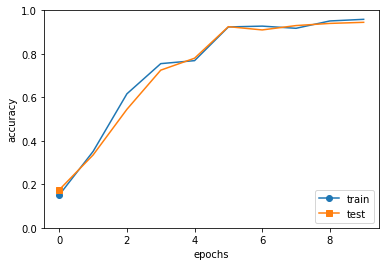

In [ ]:
network = DeepConvNet()  
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=10, mini_batch_size=100,
                  optimizer='Adam', optimizer_param={'lr':0.001}, verbose=True)
trainer.train()
train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list

markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

# Recurrent Neural Network (RNN)

## Base Model

| 에폭 1 |  반복 1 / 85 | 시간 0[s] | 퍼플렉서티 10000.48
| 에폭 1 |  반복 21 / 85 | 시간 17[s] | 퍼플렉서티 2578.13
| 에폭 1 |  반복 41 / 85 | 시간 33[s] | 퍼플렉서티 1139.29
| 에폭 1 |  반복 61 / 85 | 시간 49[s] | 퍼플렉서티 962.38
| 에폭 1 |  반복 81 / 85 | 시간 65[s] | 퍼플렉서티 863.38
| 에폭 2 |  반복 1 / 85 | 시간 69[s] | 퍼플렉서티 752.62
| 에폭 2 |  반복 21 / 85 | 시간 86[s] | 퍼플렉서티 734.71
| 에폭 2 |  반복 41 / 85 | 시간 102[s] | 퍼플렉서티 644.15
| 에폭 2 |  반복 61 / 85 | 시간 118[s] | 퍼플렉서티 610.70
| 에폭 2 |  반복 81 / 85 | 시간 134[s] | 퍼플렉서티 574.05
| 에폭 3 |  반복 1 / 85 | 시간 138[s] | 퍼플렉서티 539.99
| 에폭 3 |  반복 21 / 85 | 시간 155[s] | 퍼플렉서티 506.16
| 에폭 3 |  반복 41 / 85 | 시간 171[s] | 퍼플렉서티 474.04
| 에폭 3 |  반복 61 / 85 | 시간 187[s] | 퍼플렉서티 454.20
| 에폭 3 |  반복 81 / 85 | 시간 204[s] | 퍼플렉서티 443.70
| 에폭 4 |  반복 1 / 85 | 시간 208[s] | 퍼플렉서티 376.40
| 에폭 4 |  반복 21 / 85 | 시간 224[s] | 퍼플렉서티 398.15
| 에폭 4 |  반복 41 / 85 | 시간 241[s] | 퍼플렉서티 369.84
| 에폭 4 |  반복 61 / 85 | 시간 257[s] | 퍼플렉서티 363.90
| 에폭 4 |  반복 81 / 85 | 시간 274[s] | 퍼플렉서티 347.72


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48152 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54140 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54540 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47113 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49436 missing from current font.
  font.set_

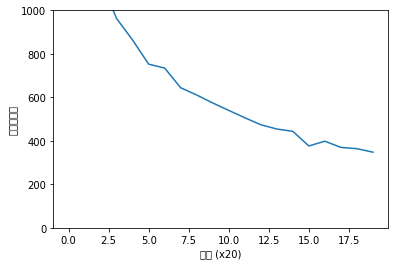

퍼플렉서티 평가 중 ...
84 / 85
테스트 퍼플렉서티:  306.36136536817565


In [ ]:
batch_size = 100
wordvec_size = 100
hidden_size = 100   
time_size = 35     
lr = 20.0
max_epoch = 4
max_grad = 0.25

corpus, word_to_id, id_to_word = ptb.load_data('train')
corpus_test, _, _ = ptb.load_data('test')
corpus=corpus[:300000]
corpus_test=corpus_test[:30000]
vocab_size = len(word_to_id)
xs = corpus[:-1]
ts = corpus[1:]

model = Rnnlm(vocab_size, wordvec_size, hidden_size)
optimizer = SGD(lr)
trainer = RnnlmTrainer(model, optimizer)

trainer.fit(xs, ts, max_epoch, batch_size, time_size, max_grad,
            eval_interval=20)
trainer.plot(ylim=(0, 1000))

model.reset_state()
ppl_test = eval_perplexity(model, corpus_test)
print('테스트 퍼플렉서티: ', ppl_test)


## Tuned Model

| 에폭 1 |  반복 1 / 85 | 시간 0[s] | 퍼플렉서티 9999.14
| 에폭 1 |  반복 21 / 85 | 시간 19[s] | 퍼플렉서티 1057.91
| 에폭 1 |  반복 41 / 85 | 시간 38[s] | 퍼플렉서티 391.35
| 에폭 1 |  반복 61 / 85 | 시간 57[s] | 퍼플렉서티 305.92
| 에폭 1 |  반복 81 / 85 | 시간 76[s] | 퍼플렉서티 267.50
| 에폭 2 |  반복 1 / 85 | 시간 81[s] | 퍼플렉서티 230.25
| 에폭 2 |  반복 21 / 85 | 시간 100[s] | 퍼플렉서티 206.33
| 에폭 2 |  반복 41 / 85 | 시간 119[s] | 퍼플렉서티 173.73
| 에폭 2 |  반복 61 / 85 | 시간 138[s] | 퍼플렉서티 157.09
| 에폭 2 |  반복 81 / 85 | 시간 157[s] | 퍼플렉서티 151.22
| 에폭 3 |  반복 1 / 85 | 시간 161[s] | 퍼플렉서티 136.77
| 에폭 3 |  반복 21 / 85 | 시간 180[s] | 퍼플렉서티 129.86
| 에폭 3 |  반복 41 / 85 | 시간 199[s] | 퍼플렉서티 119.34
| 에폭 3 |  반복 61 / 85 | 시간 218[s] | 퍼플렉서티 109.91
| 에폭 3 |  반복 81 / 85 | 시간 237[s] | 퍼플렉서티 107.92
| 에폭 4 |  반복 1 / 85 | 시간 242[s] | 퍼플렉서티 96.72
| 에폭 4 |  반복 21 / 85 | 시간 261[s] | 퍼플렉서티 94.93
| 에폭 4 |  반복 41 / 85 | 시간 279[s] | 퍼플렉서티 90.57
| 에폭 4 |  반복 61 / 85 | 시간 298[s] | 퍼플렉서티 83.28
| 에폭 4 |  반복 81 / 85 | 시간 316[s] | 퍼플렉서티 83.45


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48152 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54140 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54540 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47113 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49436 missing from current font.
  font.set_

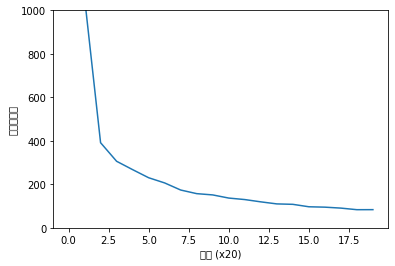

퍼플렉서티 평가 중 ...
84 / 85
테스트 퍼플렉서티:  210.17772751478512


In [ ]:
batch_size = 100
wordvec_size = 100
hidden_size = 100   
time_size = 35     
lr = 20.0
max_epoch = 4
max_grad = 0.25

corpus, word_to_id, id_to_word = ptb.load_data('train')
corpus_test, _, _ = ptb.load_data('test')
corpus=corpus[:300000]
corpus_test=corpus_test[:30000]
vocab_size = len(word_to_id)
xs = corpus[:-1]
ts = corpus[1:]

model = Rnnlm(vocab_size, wordvec_size, hidden_size)
optimizer = RMSprop(0.01)
trainer = RnnlmTrainer(model, optimizer)

trainer.fit(xs, ts, max_epoch, batch_size, time_size, max_grad,
            eval_interval=20)
trainer.plot(ylim=(0, 1000))

model.reset_state()
ppl_test = eval_perplexity(model, corpus_test)
print('테스트 퍼플렉서티: ', ppl_test)


# Sequence to Sequence (seq2seq)

## Tuned Model

| 에폭 1 |  반복 1 / 351 | 시간 0[s] | 손실 2.56
| 에폭 1 |  반복 21 / 351 | 시간 2[s] | 손실 2.11
| 에폭 1 |  반복 41 / 351 | 시간 5[s] | 손실 1.80
| 에폭 1 |  반복 61 / 351 | 시간 8[s] | 손실 1.76
| 에폭 1 |  반복 81 / 351 | 시간 11[s] | 손실 1.72
| 에폭 1 |  반복 101 / 351 | 시간 13[s] | 손실 1.67
| 에폭 1 |  반복 121 / 351 | 시간 16[s] | 손실 1.58
| 에폭 1 |  반복 141 / 351 | 시간 19[s] | 손실 1.46
| 에폭 1 |  반복 161 / 351 | 시간 22[s] | 손실 1.40
| 에폭 1 |  반복 181 / 351 | 시간 25[s] | 손실 1.34
| 에폭 1 |  반복 201 / 351 | 시간 28[s] | 손실 1.29
| 에폭 1 |  반복 221 / 351 | 시간 30[s] | 손실 1.24
| 에폭 1 |  반복 241 / 351 | 시간 33[s] | 손실 1.21
| 에폭 1 |  반복 261 / 351 | 시간 36[s] | 손실 1.17
| 에폭 1 |  반복 281 / 351 | 시간 39[s] | 손실 1.13
| 에폭 1 |  반복 301 / 351 | 시간 42[s] | 손실 1.10
| 에폭 1 |  반복 321 / 351 | 시간 44[s] | 손실 1.08
| 에폭 1 |  반복 341 / 351 | 시간 47[s] | 손실 1.03
Q 77+85  
T 162 
☒ 160 
---
Q 975+164
T 1139
☒ 1171
---
Q 582+84 
T 666 
☒ 673 
---
Q 8+155  
T 163 
☒ 161 
---
Q 367+55 
T 422 
☒ 420 
---
Q 600+257
T 857 
☒ 878 
---
Q 761+292
T 1053
☒ 1128
---
Q 830+597
T 1427
☒ 142

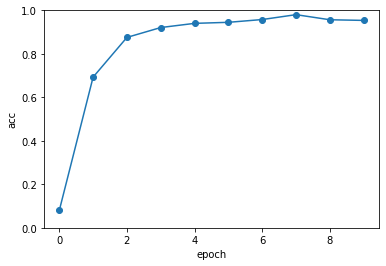

In [ ]:
(x_train, t_train), (x_test, t_test) = sequence.load_data('addition.txt')
char_to_id, id_to_char = sequence.get_vocab()

is_reverse = True    
if is_reverse:
    x_train, x_test = x_train[:, ::-1], x_test[:, ::-1]

vocab_size = len(char_to_id)
wordvec_size = 32
hideen_size = 256
batch_size = 128
max_epoch = 10
max_grad = 5.0

model = AttentionSeq2seq(vocab_size, wordvec_size, hideen_size)
optimizer = Adam(0.01)
trainer = Trainer(model, optimizer)

acc_list = []
for epoch in range(max_epoch):
    trainer.fit(x_train, t_train, max_epoch=1,
                batch_size=batch_size, max_grad=max_grad)

    correct_num = 0
    for i in range(len(x_test)):
        question, correct = x_test[[i]], t_test[[i]]
        verbose = i < 10
        correct_num += eval_seq2seq(model, question, correct,
                                    id_to_char, verbose, is_reverse)

    acc = float(correct_num) / len(x_test)
    acc_list.append(acc)
    print('검증 정확도 %.3f%%' % (acc * 100))

x = np.arange(len(acc_list))
plt.plot(x, acc_list, marker='o')
plt.xlabel('epoch')
plt.ylabel("acc")
plt.ylim(0, 1.0)
plt.show()